In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
import findspark
findspark.init("C:\spark")

In [3]:
import pyspark
from pyspark import SparkContext

In [4]:
sc = SparkContext(master = "local")
sc

<SparkContext master=local appName=pyspark-shell>

In [5]:
sc.version

'3.4.1'

In [6]:
sc.sparkUser()

'Derya'

In [7]:
sc.appName

'pyspark-shell'

In [8]:
# dir(sc)

In [49]:
sc.stop()

In [10]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

In [11]:
spark = SparkSession.builder.master("local").appName("pyspark_application").config("spark.executer.memory", "16gb") \
    .getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_application>

In [12]:
spark_df = spark.read.csv("C:/Users/Derya/Downloads/diabetes.csv", header = True, inferSchema = True)

In [13]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [14]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [15]:
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [16]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [17]:
spark_df.show(2)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [18]:
spark_df.count()

768

In [19]:
len(spark_df.columns)

9

In [20]:
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [21]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [22]:
spark_df.select("Glucose","Pregnancies").show(5)

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [23]:
spark_df.select("Glucose").distinct().count()

136

In [24]:
spark_df.select("Glucose").dropDuplicates().count()

136

In [25]:
spark_df.crosstab("Outcome","Pregnancies").show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [26]:
spark_df.dropna().show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [27]:
spark_df.filter(spark_df.Age >40).count()

194

In [28]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [29]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [30]:
spark_df.withColumn("new_value", spark_df.BMI / 2).select("BMI","new_value").show(5)

+----+---------+
| BMI|new_value|
+----+---------+
|33.6|     16.8|
|26.6|     13.3|
|23.3|    11.65|
|28.1|    14.05|
|43.1|    21.55|
+----+---------+
only showing top 5 rows



In [31]:
spark_df.withColumnRenamed("Outcome","dependent_variable").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'dependent_variable']

In [32]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [33]:
spark_df.drop("Insulin").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [34]:
x = spark_df.groupby("Outcome").count().toPandas()

In [35]:
x

,Outcome,count
0,1,268
1,0,500


In [36]:
x.iloc[1:3]

,Outcome,count
1,0,500


In [37]:
x.loc[1:3]

,Outcome,count
1,0,500


In [38]:
spark_df.registerTempTable("table_df")

In [39]:
# spark.sql("show databases").show()

In [40]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         | table_df|       true|
+---------+---------+-----------+



In [41]:
spark.sql("select Glucose from table_df").show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [42]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show(5)

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# sns.barplot(x = "Outcome", y = spark_df.Outcome.index, data = spark_df)

In [47]:
sdf = spark_df.toPandas()
sdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome'>

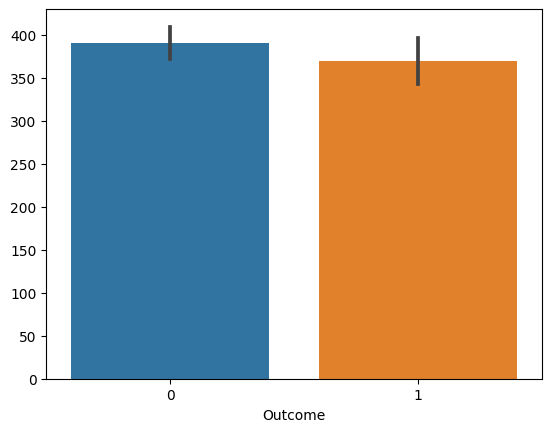

In [48]:
sns.barplot(x = "Outcome", y = sdf.Outcome.index, data = sdf)

In [50]:
sc.stop()

In [51]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext


In [52]:
spark = SparkSession.builder.master("local").appName("pyspark_application").config("spark.executer.memory", "16gb") \
    .getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_application>

In [56]:
spark_df = spark.read.csv("C:/Users/Derya/Downloads/churn.csv", header = True, inferSchema = True,sep=",")

In [57]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [58]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [59]:
spark_df.show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0

In [60]:
spark_df = spark_df.toDF(*[c.upper() for c in spark_df.columns])

In [61]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_C0|           NAMES| AGE|TOTAL_PURCHASE|ACCOUNT_MANAGER|YEARS|NUM_SITES|CHURN|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [62]:
# df.columns = map(str.upper,df.columns)

In [63]:
spark_df = spark_df.withColumnRenamed("_c0","index")

In [64]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           NAMES| AGE|TOTAL_PURCHASE|ACCOUNT_MANAGER|YEARS|NUM_SITES|CHURN|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [65]:
spark_df.count()

900

In [66]:
len(spark_df.columns)

8

In [67]:
spark_df.distinct().count()

900

In [68]:
spark_df.select("names").distinct().count()

899

In [69]:
spark_df.groupby("names").count().sort("count",ascending=False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|    Patrick Bell|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [71]:
spark_df.filter(spark_df.NAMES=="Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        NAMES| AGE|TOTAL_PURCHASE|ACCOUNT_MANAGER|YEARS|NUM_SITES|CHURN|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [76]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending=False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [79]:
spark_df.where(spark_df.index == 439).show()
spark_df.where(spark_df.index == 439).select("names").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        NAMES| AGE|TOTAL_PURCHASE|ACCOUNT_MANAGER|YEARS|NUM_SITES|CHURN|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [82]:
user = spark_df.where(spark_df.index == 439).collect()[0]["NAMES"]

In [83]:
user

'Jennifer Wood'

In [84]:
user.upper()

'JENNIFER WOOD'

In [85]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        NAMES|              AGE|   TOTAL_PURCHASE|   ACCOUNT_MANAGER|            YEARS|         NUM_SITES|              CHURN|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [86]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [112]:
spark_df.filter(spark_df.AGE > 45).count()

238

In [113]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [114]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [115]:
spark_df.groupby("churn").agg({"years": "mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [116]:
correlation_data = spark_df.drop("index","names").toPandas()

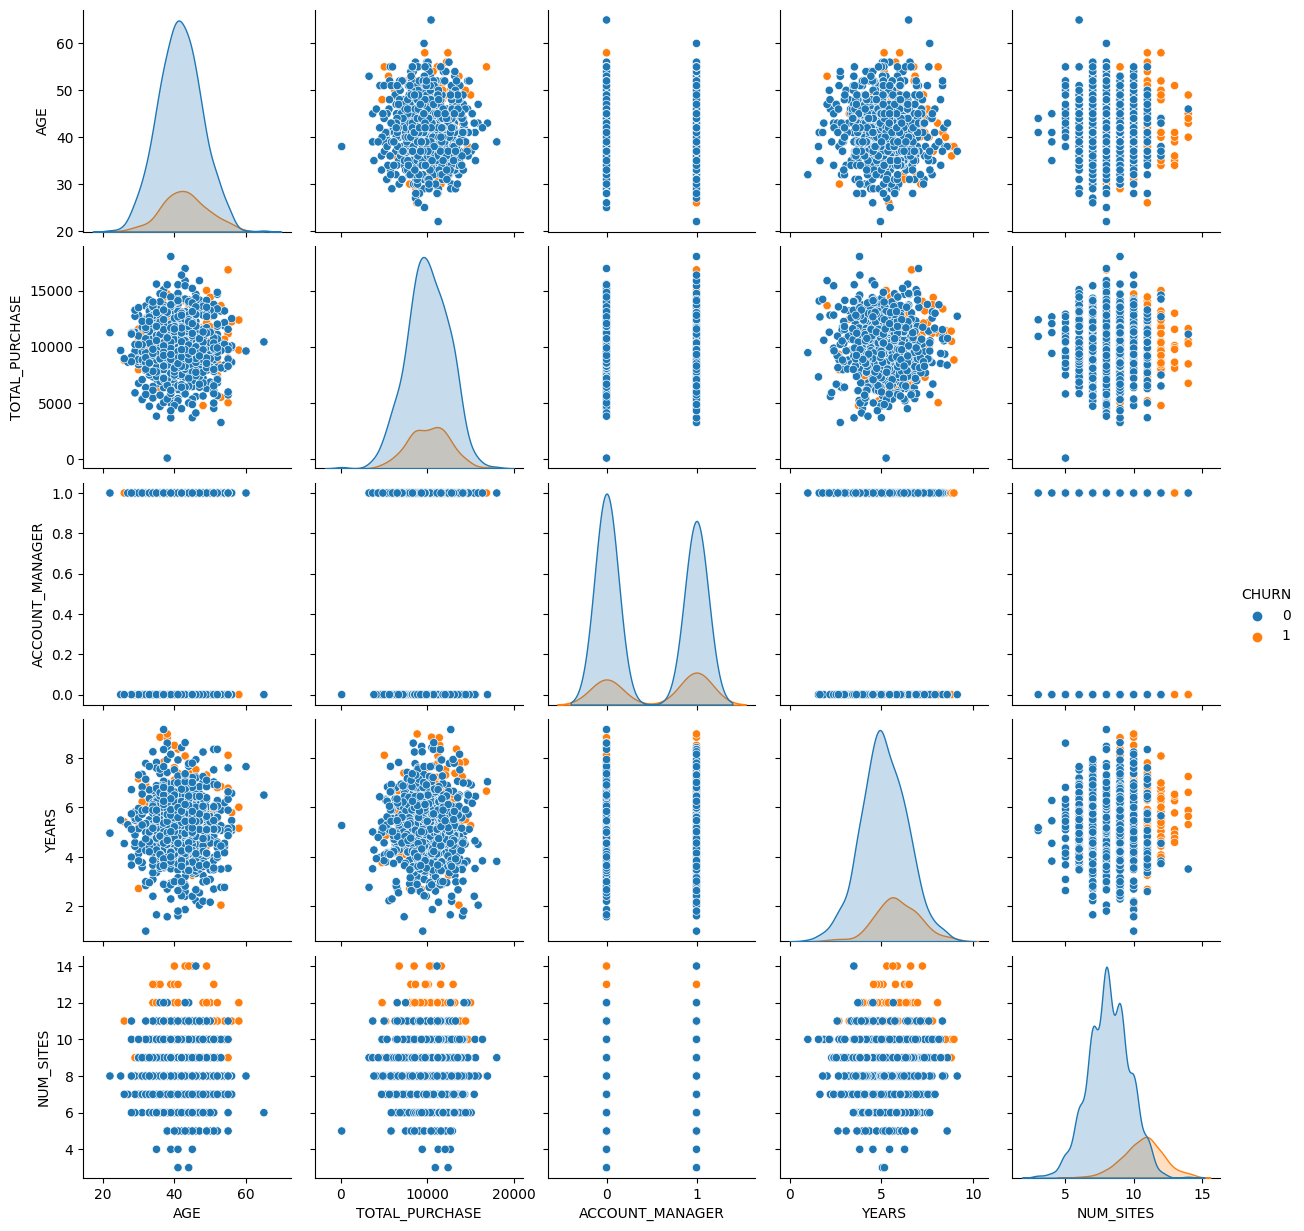

In [117]:
import seaborn as sns
sns.pairplot(correlation_data, hue = "CHURN");

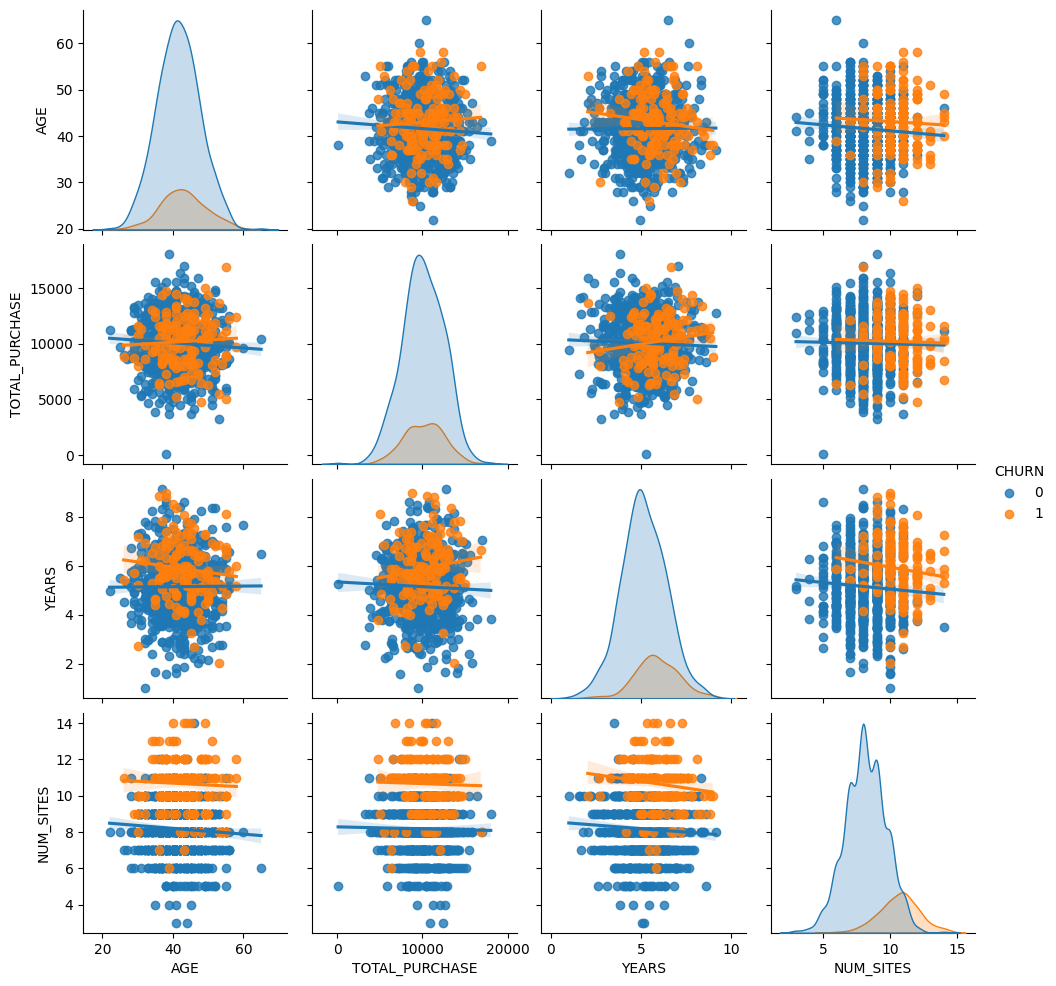

In [118]:
sns.pairplot(correlation_data, vars = ["AGE", "TOTAL_PURCHASE","YEARS","NUM_SITES"], 
             hue = "CHURN",
            kind = "reg");

In [136]:
spark_df = spark_df.dropna()

In [174]:

spark_df = spark_df.withColumn("AGE_SQUARE", spark_df.AGE**2)

In [209]:
spark_df = spark_df.drop("age_kare")
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+----------+-----+
|index|           NAMES| AGE|TOTAL_PURCHASE|ACCOUNT_MANAGER|YEARS|NUM_SITES|CHURN|AGE_SQUARE|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+----------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|    1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|    1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|    1444.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|    1764.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|    1369.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+----------+-----+
only showing top 5 rows



In [207]:

from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol = "CHURN", outputCol = "label")

In [208]:
# indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [206]:
indexed.dtypes

[('index', 'int'),
 ('NAMES', 'string'),
 ('AGE', 'double'),
 ('TOTAL_PURCHASE', 'double'),
 ('ACCOUNT_MANAGER', 'int'),
 ('YEARS', 'double'),
 ('NUM_SITES', 'double'),
 ('CHURN', 'int'),
 ('age_kare', 'double'),
 ('AGE_SQUARE', 'double'),
 ('label', 'double')]

In [204]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [193]:
spark_df.dtypes

[('index', 'int'),
 ('NAMES', 'string'),
 ('AGE', 'double'),
 ('TOTAL_PURCHASE', 'double'),
 ('ACCOUNT_MANAGER', 'int'),
 ('YEARS', 'double'),
 ('NUM_SITES', 'double'),
 ('CHURN', 'int'),
 ('age_kare', 'double'),
 ('AGE_SQUARE', 'double'),
 ('label', 'int')]

In [210]:
# Independent variables modify

from pyspark.ml.feature import VectorAssembler   # feature independent variable, label for dependent

In [211]:
spark_df.columns

['index',
 'NAMES',
 'AGE',
 'TOTAL_PURCHASE',
 'ACCOUNT_MANAGER',
 'YEARS',
 'NUM_SITES',
 'CHURN',
 'AGE_SQUARE',
 'label']

In [213]:
bag= [ 'AGE', 'TOTAL_PURCHASE', 'ACCOUNT_MANAGER', 'YEARS', 'NUM_SITES']

In [214]:
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")

In [215]:
va_df = vectorAssembler.transform(spark_df)

In [216]:
final_df = va_df.select(["features","label"])

In [217]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [239]:
# Test - Train

splits = final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [240]:
train_df

DataFrame[features: vector, label: int]

In [241]:
test_df

DataFrame[features: vector, label: int]

In [242]:
# Gradient Boosting Machines (GBM) for Customers Loyalty

from pyspark.ml.classification import GBTClassifier

In [243]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")

In [244]:
gbm_model = gbm.fit(train_df)

In [245]:
y_pred = gbm_model.transform(test_df)

In [246]:
y_pred.show(3)
y_pred

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[22.0,11254.38,1....|    0|[1.27610311256085...|[0.92772159106075...|       0.0|
|[28.0,11128.95,1....|    0|[0.73171623687666...|[0.81205710139790...|       0.0|
|[28.0,11204.23,0....|    0|[0.22176575667378...|[0.60910019721684...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 3 rows



DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [247]:
ac = y_pred.select("label","features")

In [249]:
# ac.filter(ac.label == ac.prediction).count() / ac.count()

In [250]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 10)

In [251]:
cv_model = cv.fit(train_df)

In [252]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label","prediction")

In [253]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.9233576642335767

In [254]:
evaluator.evaluate(y_pred)  # ROI AUC (area under curve)

0.884756913470116

In [271]:
import pandas as pd
names = pd.Series(["Customer 1", "Customer 2", "Customer 3","Customer 4", "Customer 5"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])

In [272]:
new_customers = pd.DataFrame({
    'NAMES':names,
    'AGE': age,
    'TOTAL_PURCHASE': total_purchase,
    'ACCOUNT_MANAGER': account_manager ,
    'YEARS': years,
    'NUM_SITES': num_sites})

new_customers.columns

Index(['NAMES', 'AGE', 'TOTAL_PURCHASE', 'ACCOUNT_MANAGER', 'YEARS',
       'NUM_SITES'],
      dtype='object')

In [273]:
new_sdf = spark.createDataFrame(new_customers)

In [274]:
type(new_sdf)

pyspark.sql.dataframe.DataFrame

In [275]:
new_sdf.show()

+----------+---+--------------+---------------+-----+---------+
|     NAMES|AGE|TOTAL_PURCHASE|ACCOUNT_MANAGER|YEARS|NUM_SITES|
+----------+---+--------------+---------------+-----+---------+
|Customer 1| 38|         30000|              1|   20|       30|
|Customer 2| 43|         10000|              0|   10|        8|
|Customer 3| 34|          6000|              0|    3|        8|
|Customer 4| 50|         30000|              1|    8|        6|
|Customer 5| 40|        100000|              1|   30|       50|
+----------+---+--------------+---------------+-----+---------+



In [276]:
new_customers = vectorAssembler.transform(new_sdf)

In [277]:
results =  cv_model.transform(new_customers)

In [278]:
results.select("names","prediction").show()

+----------+----------+
|     names|prediction|
+----------+----------+
|Customer 1|       1.0|
|Customer 2|       0.0|
|Customer 3|       0.0|
|Customer 4|       0.0|
|Customer 5|       1.0|
+----------+----------+



In [279]:
from pyspark.ml.classification import LogisticRegression
loj = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
loj_model = loj.fit(train_df)
y_pred = loj_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.9197080291970803

In [280]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_model = dt.fit(train_df)
y_pred = dt_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.9197080291970803

In [281]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_df)
y_pred = rf_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.916058394160584